## Linear regression

__피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내야한다.__

$Y = W_1*X_1+W_2*X_2+W_3*X_3+W_4*X_4...$ <br>
-> $Y$ : 종속변수 <br>
-> $X_1,X_2...$ : 독립변수(피처) <br>
-> $W_1, W_2,...$ : 회귀계수(=영향력) <br>

__선형 회귀 모델과 규제모델__ <br>
- 실제값과 예측값의 차이(오류의 제곱값)를 최소화하는 직선형 회귀선을 최적화하는 방식

1. 일반 선형회귀 : 예측값과 실제값의 RSS(Residual Sum of Squares)를 최소화할 수 있도록 회귀계수를 최적화하며, 규제(Regularization)를 적용하지 않은 모델
2. 릿지(Ridge) : 릿지회귀는 선형회귀에 L2규제를 추가한 회귀모델. 릿지회귀는 L2규제를 적용하는데, `L2규제는 상대적으로 큰 회귀계수 갑스이 예측 영향력을 감소시키기 위해 회귀 계수 값을 더 작게 만드는 규제 모델`
3. 라쏘(Lasso) : 라쏘회귀는 선형회귀에 L1규제를 적용한 방식. L2규제가 회귀계수 값의 크기를 줄이는 데 반해, `L1규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것`. 이러한 특성 때문에 L1규제는 피처 선택 기능으로도 불린다. 
4. 엘라스티넷(ElasticNet) : L2,L1규제를 함께 결합한 모델. 주로 피처가 많은 데이터 세트에서 적용되며, L1규제로 피처의 개수를 줄임과 동시에 L2규제로 계수 값의 크기를 조정.
5. 로지스틱회귀(logistic regression): 로지스틱회귀는 회귀라는 이름이 붙어있지만, 사실은 분류에 사용되는 선형모델. 로지스틱회귀는 매우 강력한 분류 알고리즘. 일반적으로 이진분류 뿐만 아니라 희소 영역의 분류, 예를 들어 텍스트 분류와 같은 영역에서 뛰어난 예측 성능을 보인다. 

__단순 선형 회귀__

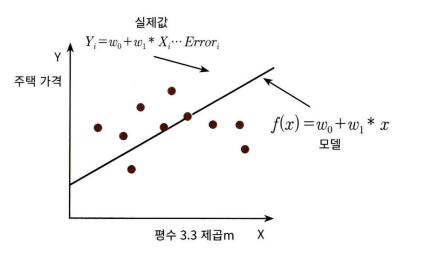

$Y(실제값) = Y-_hat(예측값) + 오류값$ <br>
=> $y = w_0(intercept_) + w_1*X + 오류값$

- 오류값 = 잔차
    즉, 최적의 회귀 모델을 만든다는 것은 전체 데이터의 잔차(오류값) 합이 최소가 되는 모델을 만든다는 의미. 동시에 오류 값 합이 최소가 될 수 있는 최적의 회귀 계수를 찾는다는 의미.

    오류 값은 +나 -가 될 수 있다. 그래서 전체 데이터의 오류 합을 구하기 위해 단순히 더했다가는 뜻하지 않게 오류 합이 크게 줄어들 수 있다. 따라서 보통 오류 합을 계산할 때는 절댓값(MAE)을 취해서 더하거나, 오류 값의 제곱을 구해서 더하는 방식(RSS)을 취한다. 

    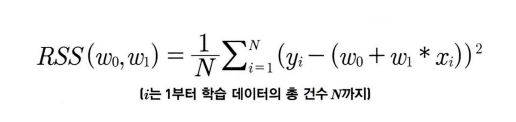


- 비용함수(=손실함수)
    회귀에서 RSS는 비용(cost)이며 W변수(회귀계수)로 구성되는 RSS를 비용함수라고 한다. 머신러닝 회귀 알고리즘은 데이터를 게속 학습하면서 이 `비용 함수가 반환하는 값(즉, 오류값)을 지속해서 감소시키고 최종적으로 더 이상 감소하지 않는 최소의 오류 값을 구하는 것.` 

__어떻게 비용함수가 최소가 되는 W파라미터를 구할 수 있을까? : 경사하강법(Gradient Descent)__

1. 경사하강법? <br>
    '점진적으로' 반복적인 계산을 통해  `W파라미터 값을 업데이트`하면서 오류 값이 최소가 되는 W파라미터를 구하는 방식 <br>
    예시 : 운동장에서 힘껏 야구공을 던지면 이 공의 속도가 처음에는 증가하다가 점차 감소하면서 땅에 떨어질 것. 처음에는 가속도가 계속 증가하면서 속도가 증가하고, 더 이상 가속도가 증가하지 않으면 그때가 최고 속도이며, 그 후에는 가속도가 마이너스(-)가 되면서 속도가 떨어지고 마침내 공이 땅에 떨어진다. <br>
    -> 가속도의 값은 속도의`미분`으로 구할 수 있다. <br>
    -> 속도와 같은 포물선 형태의 2차함수의 최저점은 해당 2차 함수의 미분 값인 1차 함수의 기울기가 가장 최소일 때 <br>

    즉, 비용함수가 포물선 형태의 2차함수라면 경사하강법은 최초 w에서부터 미분을 적용한 뒤 이 미분 값이 계속 감소하는 방향으로 순차적으로 w를 업데이트한다. 마침내 더 이상 미분된 1차 함수의 기울기가 감소하지 않는 지점을 비용함수가 최소인 지점으로 간주하고 그때의 w를 반환. 

    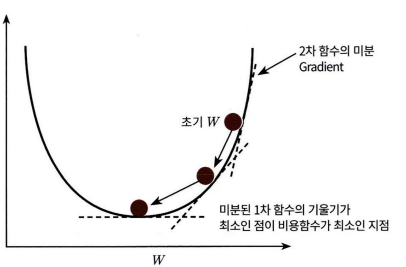

2. 공식을 통해 알아보기 <br>
    비용함수 $RSS(w_0, w_1) = R(w)$라고 할 때, R(w)는 변수가 w파라미터로 이루어진 함수. <br>
    R(w)는 두개의 w파라미터인 $w_0$과 $w_1$을 각각 가지고 있기 떄문에 일반적인 미분을 적용할 수 없고, $w_0, w_1$ 각 변수에 편미분을 적용해야 한다. 

    편미분을 한 결과, <br> 
    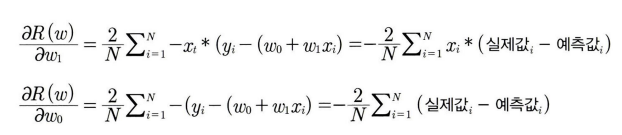

    $w_1, w_0$의 편미분 값들을 반복적으로 보정하면서 업데이트하면 비용함수 R(w)가 최소가 되는 $w_0, w_1$을 구할 수 있다. 업데이트는 새로운 $w_1$을 이전 $w_1$에서 편미분 결괏값을 마이너스(-)하면서 적용한다. 

    편미분 값이 너무 클 수 있기 때문에 보정계수 n을 곱하는데 이를 `학습률`이라고 한다. 

### 경사하강법 파이썬 코드로 구현해보기

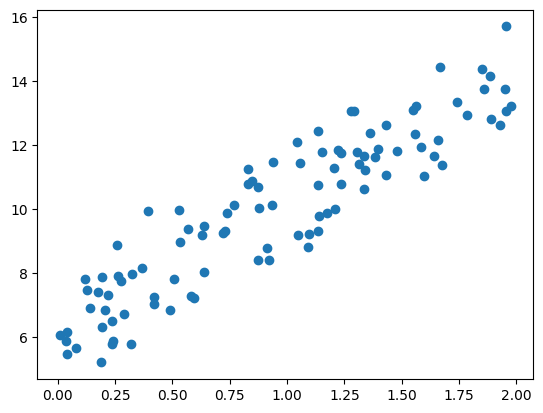

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
# y = 4X+6 을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦.
X = 2 * np.random.rand(100,1)
y = 6 + 4 * X + np.random.randn(100,1)

# x, y 데이터를 세트 산점도로 시각화
plt.scatter(X,y)

In [3]:
# 비용함수 정의 (실제값-예측값)^2의 합 / n
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

In [4]:
# 경사하강법 함수
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)

    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred

    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N) * learning_rate * (np.dot(X.T, diff))
    w0_update = -(2/N) * learning_rate * (np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [6]:
# 입력 인자 iters로 주어진 횟수만큼 반복적이고 w1과 w0를 업데이트 적용함. 
def gradient_descent_steps(X, y, iters=10000):
    # w0과 w1을 모두 0으로 초기화.
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행.
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [7]:
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


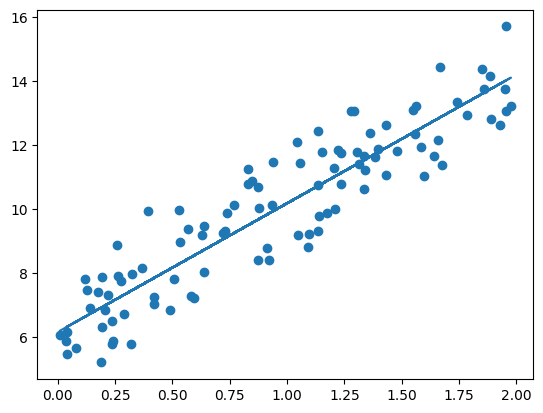

In [8]:
plt.scatter(X, y)
plt.plot(X, y_pred)

> Gradient Descent는 반복적으로 비용함수 최소화를 위한 값을 업데이트하기 떄문에 수행시간이 매우 오래 걸린다는 단점이 있다. 그 떄문에 실전에서는 대부분 확률적 경사하강법(Stochastic Gradient Descent)를 이용한다. 

### 확률적 경사 하강법 Stochastic Gradient Descent
- 전체 입력 데이터로 w가 업데이트되는 값을 계산하는 것이 아니라 일부 데이터만 이용해 w가 업데이트되는 값을 계산하므로 경사하강법에 비해서 빠른 속도를 보장. 

In [9]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0

    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size 만큼 데이터를 추출해 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [10]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:", round(w1[0,0], 3), 'w0:', round(w0[0,0], 3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


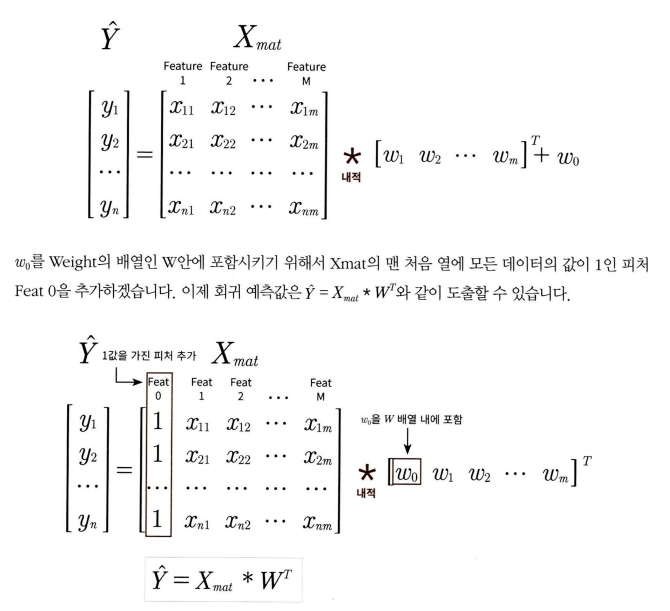

*************

### LinearRegression 클래스 - Ordinary Least Squares
- LinearRegression 클래스는 예측값과 실제값의 RSS(Residual Sum of Squares)를 최소화해 OLS(Ordinary Least Squares) 추정 방식으로 구현한 클래스. 

- Ordinary Least Squares 기반의 회귀 계수 계산은 입력 피처의 독립성에 많은 영향을 받는다. 
    다중 공선성(multi-collinearity) 문제 : 피처 간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감. <br>
    일반적으로 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제를 적용. 또한 매우 많은 피처가 다중 공선성 문제를 가지고 있다면 PCA를 통해 차원 축소를 수행하는 것도 고려 할 수 있다.


**class sklearn.linear_model.LinearRegression(fit_intercept=True, noramlize=False, copy_X=True, n_jobs=1)**
- fit_intercept : intercept 값을 계산할(True=default) 것인지 말지(False) 지정. False로 지정하면 intercept가 사용되지 않고 0으로 지정. <br>
- normalize : 디폴트는 False. fit_intercept가 False인 경우에는 이 파라미터가 무시된다. 만일 True이면 회귀를 수행하기 전에 입력 데이터 세트를 정규화한다. <br>

### 회귀 평가 지표
__실제값과 회귀 예측값의 차이 값을 기반으로 한 지표가 중심__ <br>
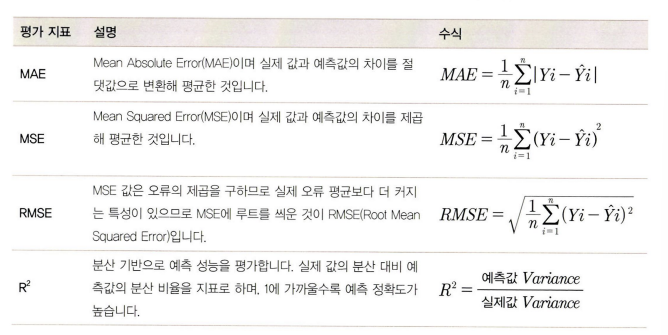

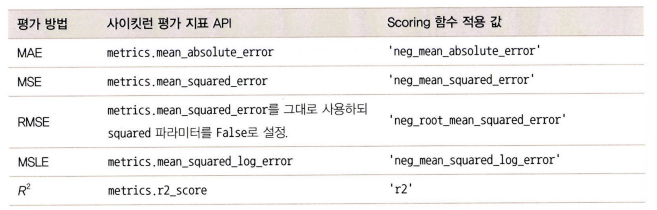

cross_val_score, GridSearchCV와 같은 scoring함수에 회귀평가 지표를 적용할 떄 한가지 유의할 점이 있다. <br>
예를 들어 MAE의 scoring 파라미터를 보면, 'neg_mean_absolute_error'와 같이 neg_라는 접두어가 붙어 있다. 이는 Negative(음수)값을 가진다는 의미인데, MAE는 절댓값의 합이기 때문에 음수가 될 수 없다. <br>
그런데, scoring함수에 'neg_mean_absolute_error'를 적용해 음수값을 반환하는 이유는 사이킷런의 Scoring함수가 score값이 클수록 좋은 평가 결과로 자동평가하기 때문이다. 그런데 `실제값과 예측값의 오류 차이를 기반으로 하는 회귀 평가 지표의 경우 값이 커지면 오히려 나쁜 모델이라는 의미`이므로 이를 사이킷런의 Scoring함수에 일반적으로 반영하려면 보정이 필요하다. 

### 1. 패키지 설치 및 데이터 로드

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [27]:
bostonDF = pd.read_excel(r'C:\Users\hanjieun_2\Desktop\개인공부\algorithms\1.ML\1.Supervised_Learning\2.Estimation\datasets\bostonhousingprice.xls')
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


|변수|설명|
|---|---|
|CRIM|지역별 범죄 발생률|
|ZN|25000평방피트를 초과하는 거주 지역의 비율|
|INDUS|비상업 지역 넓이 비율|
|CHAS|찰스강에 대한 더미변수 (강의 경계에 위치한 경우1, 아니면 0)|
|NOX|일산화질소 농도|
|RM|거주할 수 있는 방 개수|
|AGE|1940년 이전에 건축된 소유 주택의 비율|
|DIS|5개 주요 고용센터까지의 가중거리|
|RAD|고속도로 접근 용이도|
|TAX|10000달러당 재산세율|
|PTRATIO|지역의 교사와 학생 수 비율|
|B|지역의 흑인 거주 비율|
|LSTAT|하위 계층의 비율|
|MEDV|본인 소유의 주택 가격(중앙값)|

In [28]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  MEDV       506 non-null    float64
 14  CAT. MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


> 결측치는 없는 것으로 확인

In [29]:
bostonDF.drop('CAT. MEDV', axis=1, inplace=True)
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### 2. EDA

In [41]:
len(list(bostonDF.columns))

14

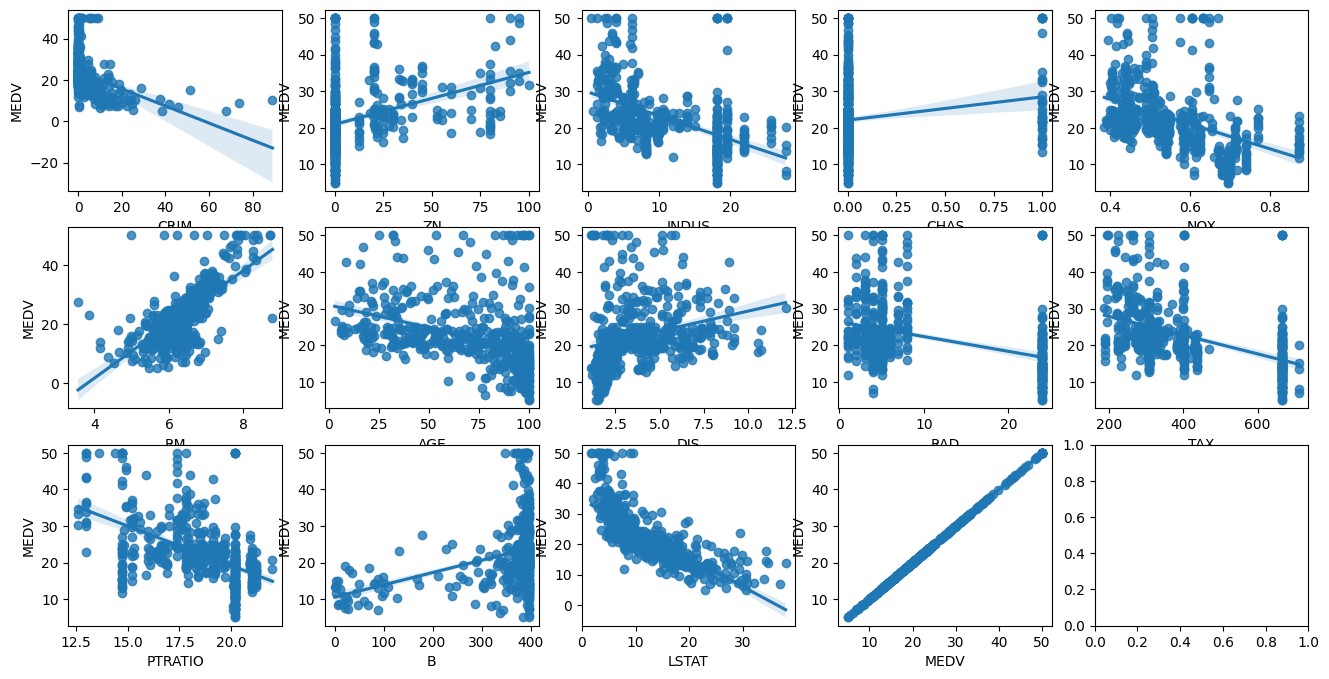

In [42]:
fig, axs = plt.subplots(figsize=(16,8), ncols=5, nrows=3)
for i, feature in enumerate(list(bostonDF.columns)):
    row = int(i/5)
    col = i%5
    sb.regplot(x=feature, y='MEDV', data=bostonDF, ax=axs[row][col])

> RM(+)과 LSTAT(-)의 MEDV(price) 영향도가 가장 두드러진다. 

### 3. 학습, 테스트 셋 분리

In [43]:
from sklearn.model_selection import train_test_split

y_target = bostonDF['MEDV']
X_data = bostonDF.drop(['MEDV'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

### 4. 선형회귀모델링 및 평가

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE:{0:.3f}, RMSE:{1:.3f}'.format(mse, rmse))
print('Variance score:{0:.3f}'.format(r2_score(y_test, y_preds)))

MSE:17.297, RMSE:4.159
Variance score:0.757


In [47]:
print('절편값:', lr.intercept_)
print('회귀계수값:', np.round(lr.coef_,1))

절편값: 40.995595172164506
회귀계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [48]:
# 회귀계수와 해당 피처 서로 매핑시키기.
coeff = pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

> RM이 양의 값으로 회귀계수가 가장 크며, NOX 피처의 회귀 계수 - 값이 너무 커보인다. 차츰 최적화를 수행하면서 피처 coefficients의 변화를 살펴보자.

In [49]:
from sklearn.model_selection import cross_val_score

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 fold의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print('5 fold의 개별 RMSE scores:', np.round(rmse_scores, 2))
print('5 fold의 개별 평균 RMSE scores:{0:.3f}'.format(avg_rmse))

5 fold의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 fold의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 fold의 개별 평균 RMSE scores:5.829
